# Exploring the MovieLens 1M Dataset

#### Extrated (and slightly modified) from *Python for Data Analysis (Wes McKinney)*

This dataset contains 1 million ratings collected from 6000 users on 4000 movies, and it is organized into three tables:


*   Ratings
*   Users
*   Movie information

Each table is available as a separate file, each containing a series of rows where columns are separated by *::*


[Download the dataset here](http://files.grouplens.org/datasets/movielens/ml-1m.zip)

This example illustrates a series of interesting things that we can learn from this dataset. Most operations will be performed using the pandas library. For more details, please refer to *Python for Data Analysis - page 26*.

## **Code**

Let's begin by importing pandas. It is conventional to use *pd* to denote pandas

In [3]:
import pandas as pd

Next we will import each of the three tables and assign names to each of the columns:

In [4]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python')


Let's take a look at the first 5 rows of each table:

In [5]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Having all information spread across different tables makes it much more dificult to analyse the data. Using pandas's merge function, we first merge ratings with users then we merge that result with the movies data. pandas infers which columns to
use as the merge (or join) keys based on overlapping names:

In [8]:
data = pd.merge(pd.merge(ratings, users), movies)

Below is the first row in that dataset

In [9]:
data.head(1)

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama


In this form, aggregating the ratings grouped by one or more user or movie characteristics is straightforward once you build some familiarity with pandas. To get mean movie ratings for each film grouped by gender, we can use the pivot_table method:


In [10]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')

In [11]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


If we wish to only look at movies that received more than a certain number of ratings, we can group them as follows (here using 250 ratings):

In [12]:
ratings_by_title = data.groupby('title').size()

In [13]:
ratings_by_title[:5]

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

Let's now grab the titles of movies that were rated more than 250 times:

In [14]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [15]:
active_titles[:5]

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)',
       '12 Angry Men (1957)'],
      dtype='object', name='title')

The index of titles receiving at least 250 ratings can then be used to select rows from mean_ratings above:


In [16]:
mean_ratings = mean_ratings.ix[active_titles]

In [17]:
mean_ratings[:5]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


To see the top films among female viewers, we can sort by the F column in descending order:

In [18]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [19]:
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


Likewise, for males:

In [20]:
top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)

In [21]:
top_male_ratings[:10]

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


Suppose you wanted to find the movies that are most divisive between male and female viewers. One way is to add a column to *mean_ratings* containing the difference in means, then sort by that:

In [22]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

Sorting by 'diff' gives us the movies with the greatest rating difference and which were preferred by women:

In [23]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [24]:
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


Reversing the order of the rows and again slicing off the top 10 rows, we get the movies preferred by men that women didn’t rate highly:


In [25]:
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


## Data Exploration Extension

* An aggregate of the movie ratings for each particular genre.

In [26]:
mean_genre_ratings = data.pivot_table('rating', index='genres', aggfunc='mean')

In [27]:
mean_genre_ratings[:5]

genres
Action                                           3.354886
Action|Adventure                                 3.676814
Action|Adventure|Animation                       4.147826
Action|Adventure|Animation|Children's|Fantasy    2.703704
Action|Adventure|Animation|Horror|Sci-Fi         3.546926
Name: rating, dtype: float64

* The top 5 highest ranked genre by women

In [28]:
mean_genre_ratings_gender = data.pivot_table('rating', index='genres', columns='gender', aggfunc='mean')

In [29]:
mean_genre_ratings_gender[:5]

gender,F,M
genres,,
Action,3.367474,3.352991
Action|Adventure,3.701213,3.671115
Action|Adventure|Animation,3.843750,4.217082
Action|Adventure|Animation|Children's|Fantasy,3.146341,2.510638
Action|Adventure|Animation|Horror|Sci-Fi,3.422535,3.563071


In [30]:
top_genre_female_ratings = mean_genre_ratings_gender.sort_values(by='F', ascending=False)

In [31]:
top_genre_female_ratings[:5]

gender,F,M
genres,,
Animation|Comedy|Thriller,4.550802,4.445110
Animation,4.533333,4.353107
Film-Noir|Romance|Thriller,4.448718,4.211073
Sci-Fi|War,4.376623,4.464789
Adventure|Children's|Drama|Musical,4.355030,4.203138


* The top 5 highest ranked genre by men

In [32]:
top_genre_male_ratings = mean_genre_ratings_gender.sort_values(by='M', ascending=False)

In [33]:
top_genre_male_ratings[:5]

gender,F,M
genres,,
Sci-Fi|War,4.376623,4.464789
Animation|Comedy|Thriller,4.550802,4.445110
Film-Noir|Mystery,4.319444,4.381536
Adventure|War,4.187970,4.376633
Animation,4.533333,4.353107


* A breakdown of a movie’s ratings by age, use any movie of your choice.

Plan to use movie 'One Flew Over the Cuckoo's Nest (1975)' with movie_id = 1193.

In [34]:
target_movie_ratings = data[data['movie_id'] == 1193][['title', 'rating', 'age']]

In [35]:
target_movie_ratings.head()

,title,rating,age
0,One Flew Over the Cuckoo's Nest (1975),5,1
1,One Flew Over the Cuckoo's Nest (1975),5,56
2,One Flew Over the Cuckoo's Nest (1975),4,25
3,One Flew Over the Cuckoo's Nest (1975),4,25
4,One Flew Over the Cuckoo's Nest (1975),5,50


In [36]:
target_movie_ratings_breakdown_by_age = target_movie_ratings.pivot_table('rating', index='title', columns='age', aggfunc='mean')

In [37]:
target_movie_ratings_breakdown_by_age

age,1,18,25,35,45,50,56
title,,,,,,,
One Flew Over the Cuckoo's Nest (1975),4.222222,4.457831,4.412371,4.389578,4.319372,4.310345,4.411765


* A function that given a user_id and movie_id , returns a list of user_ids for other users that rated the movie identified by the provided movie_id with the same score. 

In [38]:
def get_users_with_same_scores(user_id, movie_id):
    ratings2 = ratings.groupby(['movie_id', 'user_id']).mean().drop(['timestamp'], axis=1)
    target_movie_user_ratings = ratings2.loc[movie_id]
    target_rating = target_movie_user_ratings.loc[user_id]['rating']
    users_with_same_ratings = target_movie_user_ratings[target_movie_user_ratings['rating'] == target_rating]
    result_list = users_with_same_ratings.index.tolist()
    result_list.remove(user_id)
    return result_list

Assume we want to try this function on user_id = 1 and movie_id = 1193

In [39]:
get_users_with_same_scores(1, 1193)

[2,
 17,
 19,
 24,
 33,
 39,
 53,
 54,
 58,
 81,
 88,
 89,
 95,
 102,
 107,
 120,
 123,
 131,
 150,
 155,
 166,
 169,
 175,
 180,
 190,
 195,
 208,
 235,
 236,
 259,
 261,
 265,
 266,
 270,
 281,
 287,
 292,
 293,
 297,
 299,
 300,
 301,
 306,
 307,
 315,
 319,
 327,
 332,
 334,
 339,
 352,
 355,
 357,
 361,
 409,
 424,
 425,
 437,
 438,
 439,
 440,
 442,
 445,
 451,
 453,
 462,
 477,
 480,
 482,
 489,
 491,
 502,
 504,
 505,
 507,
 515,
 516,
 520,
 524,
 526,
 529,
 537,
 549,
 550,
 551,
 558,
 560,
 582,
 588,
 599,
 611,
 622,
 626,
 637,
 650,
 661,
 671,
 673,
 677,
 679,
 681,
 682,
 692,
 701,
 710,
 711,
 743,
 744,
 746,
 752,
 760,
 764,
 770,
 771,
 774,
 784,
 785,
 791,
 833,
 839,
 840,
 841,
 843,
 846,
 870,
 900,
 919,
 928,
 935,
 946,
 957,
 965,
 980,
 983,
 994,
 1010,
 1015,
 1017,
 1018,
 1019,
 1027,
 1028,
 1035,
 1036,
 1038,
 1040,
 1048,
 1058,
 1062,
 1068,
 1077,
 1084,
 1088,
 1098,
 1099,
 1101,
 1105,
 1108,
 1113,
 1117,
 1121,
 1124,
 1133,
 1134,
 

# Additional Ideas

* What are the 10 most rated movies? And what are their ratings?

In [40]:
most_rated10 = data.groupby('title').size().sort_values(ascending=False)[:10]

In [41]:
most_rated10

title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
dtype: int64

In [42]:
general_mean_ratings = data.pivot_table('rating', index='title', aggfunc='mean')

In [43]:
general_top_10_mean_ratings = general_mean_ratings[general_mean_ratings.index.isin(most_rated10.index)].to_frame().sort_values(['rating'], ascending=False)

In [46]:
general_top_10_mean_ratings

,rating
title,
Star Wars: Episode IV - A New Hope (1977),4.453694
"Silence of the Lambs, The (1991)",4.351823
Saving Private Ryan (1998),4.337354
American Beauty (1999),4.317386
"Matrix, The (1999)",4.315830
Star Wars: Episode V - The Empire Strikes Back (1980),4.292977
Terminator 2: Judgment Day (1991),4.058513
Star Wars: Episode VI - Return of the Jedi (1983),4.022893
Back to the Future (1985),3.990321


We can see that the 10 most rated movies are rated more than 2500 times. And their ratings are close or above 4.0. This means these 10 movies are quite popular among people. Whoever wants to find good movies can refer to this list.

* Among the 10 most rated movies, whichi one do men and women most disagree on?

In [47]:
top_10_ratings_gender = mean_ratings[mean_ratings.index.isin(most_rated10.index)].sort_values(['diff'], ascending=False)

In [48]:
top_10_ratings_gender

gender,F,M,diff
title,,,
Terminator 2: Judgment Day (1991),3.785088,4.115367,0.330279
Saving Private Ryan (1998),4.114783,4.398941,0.284159
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577,0.238096
Jurassic Park (1993),3.579407,3.814197,0.234791
"Matrix, The (1999)",4.128405,4.362235,0.233830
Star Wars: Episode VI - Return of the Jedi (1983),3.865237,4.069058,0.203821
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307,0.192371
"Silence of the Lambs, The (1991)",4.271955,4.381944,0.109990
American Beauty (1999),4.238901,4.347301,0.108400


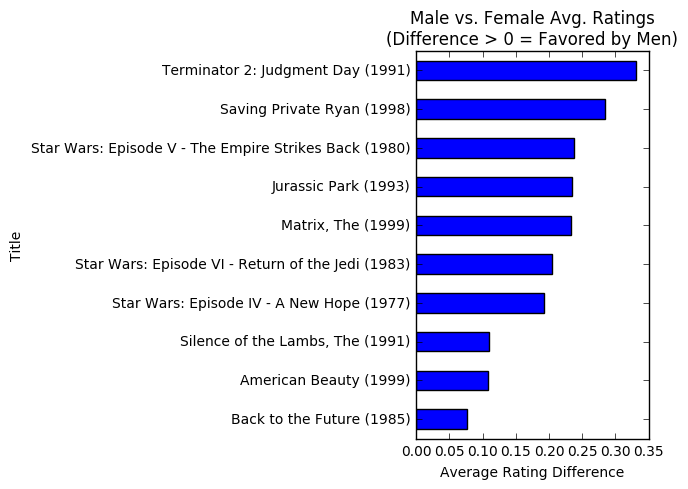

In [49]:
import matplotlib.pyplot as plt
import pylab

disagreements = top_10_ratings_gender['diff']
disagreements.sort_values().plot(kind='barh', figsize=[3, 5])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');
pylab.show()

It is interesting to see that the top 10 movies are all favoured by men. Possibly because the genres are mostly action/sci-fi. Therefore if we are doing a '10 most highly-rated movies', we may need to consider a male version and a female version. 

* What genres do men and women most disagree on?

In [50]:
mean_genre_ratings_gender['diff'] = mean_genre_ratings_gender.M - mean_genre_ratings_gender.F

In [51]:
mean_genre_ratings_gender.sort_values(['diff'], ascending=False).head()

gender,F,M,diff
genres,,,
Comedy|Film-Noir|Thriller,1.000000,2.250000,1.250000
Crime|Mystery,2.687500,3.360656,0.673156
Action|Adventure|Comedy|Horror,3.297297,3.909283,0.611985
Action|Western,3.541667,4.144167,0.602500
Action|Animation|Children's|Sci-Fi|Thriller|War,2.857143,3.433333,0.576190


In [52]:
mean_genre_ratings_gender.sort_values(['diff'], ascending=False).tail()

gender,F,M,diff
genres,,,
Children's|Musical,3.859504,3.286325,-0.573179
Action|Adventure|Animation|Children's|Fantasy,3.146341,2.510638,-0.635703
Action|Comedy|Romance|Thriller,3.254717,2.578358,-0.676359
Children's|Drama|Fantasy,3.538462,2.756410,-0.782051
Fantasy,NaN,4.000000,NaN


The first table shows genres more flavored by men, and the second table shows genres more flavored by women. It is interesting to see that men prefer action movies, and female prefer children movies. We can take this into consideration when doing a '10 most highly-rated movies' recommendation like I mentioned above. I know that the data for genres is not the best. We will get more clear results if we separate the genres, so that each row will have only one genre, instead of the current mixed genres. We can achieve as follow-ups later on.